## 先 conv 再 pool ，Filter個數會越來越多，最後再放個普通層

# 初始準備

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 讀入資料庫

In [3]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 輸入格式整理

CNN 的 input 通常吃矩陣，不用像 nn 一樣壓平，但是圖片通常有 RGB 三個 channel。

而 mnist 因為是灰階所以只有 1 個 channel

In [5]:
# 用 reshape 來整理形狀、增加 channel

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[9487].shape

(28, 28, 1)

In [7]:
# 把原圖放在大 X
X = x_train[9487][:, :, 0]
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

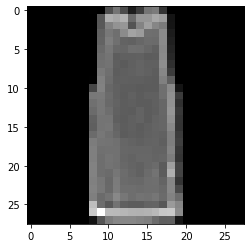

In [8]:
plt.imshow(X, cmap='gray')

# 整理輸出格式

一樣，我們要把輸出用成 1-hot

In [9]:
from keras.utils import np_utils

In [10]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 開始打造你的 CNN

要用幾層 convolution? 是否每層後面都要接 max-pooling? 

filter 大小? max-pooling 區塊大小?

最後壓平、送入標準神經網路(又要決定幾層、多少神經元)..

Final: 三次conv配max-pooling，再送進200神經元的dense，最後輸出1-hot

In [11]:
# 讀入必要套件
# Flatten 是壓平成一根的好物

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [12]:
model = Sequential()

In [13]:
# Conv2D用法: Conv2D(filter個數, filter大小, padding=conv後的圖片大小)
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
# 後面開始不用 input_shape
# filter 個數越來越多
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
# 最後用 Flatten 壓平，送入 Dense 層
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))

In [20]:
# 輸出層，希望結果加起來是 1
model.add(Dense(10))
model.add(Activation('softmax'))

# 組裝神經網路

In [21]:
# metrics=['accuracy'] 能告訴我們目前正確率是如何
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

# 檢視神經網路

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

# 訓練神經網路

In [23]:
model.fit(x_train, y_train, batch_size=100, epochs=12)




Epoch 1/12





60000/60000 [==============================] - 45s 745us/step - loss: 0.1798 - acc: 0.1007
Epoch 2/12
60000/60000 [==============================] - 47s 791us/step - loss: 0.1800 - acc: 0.1000
Epoch 3/12
60000/60000 [==============================] - 46s 759us/step - loss: 0.1800 - acc: 0.1000
Epoch 4/12
60000/60000 [==============================] - 45s 756us/step - loss: 0.1322 - acc: 0.3060
Epoch 5/12
60000/60000 [==============================] - 46s 764us/step - loss: 0.0244 - acc: 0.8319
Epoch 6/12
60000/60000 [==============================] - 46s 772us/step - loss: 0.0197 - acc: 0.8658
Epoch 7/12
60000/60000 [==============================] - 51s 852us/step - loss: 0.0177 - acc: 0.8801
Epoch 8/12
60000/60000 [==============================] - 47s 783us/step - loss: 0.0164 - acc: 0.8887
Epoch 9/12
60000/60000 [==============================] - 46s 770us/step - loss: 0.0153 - acc: 0.8969
Epoch 10/12
60000/60000 [==============================] - 47s 786us/step 

# 結果測試

In [24]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 255us/step


In [25]:
print('loss:', score[0])
print('acc:', score[1])

loss: 0.016649032057821752
acc: 0.8881


# 儲存結果

In [26]:
model_json = model.to_json()
open('handwriting_model_cnn.json', 'w').write(model_json)
model.save_weights('handwriting_weights_cnn.h5')

# 欣賞成果

In [27]:
predict = model.predict_classes(x_test)

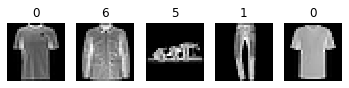

In [36]:
pick = np.random.randint(1, 9999, 5)

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='gray')
    plt.title(predict[pick[i]])
    plt.axis('off')